In [25]:
import math
import os
import scipy
from scipy.optimize import lsq_linear
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, halfnorm
import random
from scipy.io import loadmat
import random
import pickle
import sys
sys.path.append(r"c:\Users\katie\OneDrive\Documents\GitHub\trial")
import PCA_Regress as pcar

In [26]:
base_path =r"c:\Users\katie\OneDrive\Desktop\Thesis"
with open(base_path+'\J_neu.pkl', "rb") as input_file:
    J_pickle = pickle.load(input_file)
del input_file

file_path = os.path.join(base_path, 'N_neu.pkl')
with open(file_path, "rb") as input_file:
    N_pickle = pickle.load(input_file)
del input_file

base_path =r"c:\Users\katie\OneDrive\Desktop\Thesis"
with open(base_path+'\J_mus.pkl', "rb") as input_file:
    J_pickle_m = pickle.load(input_file)
del input_file

ile_path = os.path.join(base_path, 'N_mus.pkl')
with open(ile_path, "rb") as input_file:
    N_pickle_m = pickle.load(input_file)
del input_file

# base_path = "/Users/kb6113/Desktop/Thesis"
# with open(base_path+'/J_neu.pkl', "rb") as input_file:
#     J_pickle = pickle.load(input_file)
# del input_file

# with open(base_path+'/J_mus.pkl', "rb") as input_file:
#     J_pickle_m = pickle.load(input_file)
# del input_file

J_all_tensor = J_pickle['J_all']['interpPSTH']
J_M1_tensor = J_pickle['J_M1']['interpPSTH']
J_PMd_tensor = J_pickle['J_PMd']['interpPSTH']
J_mus_tensor = J_pickle_m['interpPSTH']
J_mus_stack = np.vstack((J_mus_tensor, J_mus_tensor, J_mus_tensor, J_mus_tensor))


N_all_tensor = N_pickle['N_all']['interpPSTH']
N_M1_tensor = N_pickle['N_M1']['interpPSTH']
N_PMd_tensor = N_pickle['N_PMd']['interpPSTH']
N_mus_tensor = N_pickle_m['interpPSTH']

<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:12: SyntaxWarning: invalid escape sequence '\J'
<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:12: SyntaxWarning: invalid escape sequence '\J'
C:\Users\katie\AppData\Local\Temp\ipykernel_23144\3559308067.py:2: SyntaxWarning: invalid escape sequence '\J'
  with open(base_path+'\J_neu.pkl', "rb") as input_file:
C:\Users\katie\AppData\Local\Temp\ipykernel_23144\3559308067.py:12: SyntaxWarning: invalid escape sequence '\J'
  with open(base_path+'\J_mus.pkl', "rb") as input_file:


In [27]:
# J_mus_stack = np.vstack((J_mus_PSTH, J_mus_PSTH, J_mus_PSTH, J_mus_PSTH))
# J_mus_mc = J_mus_stack - np.mean(J_mus_stack, axis = 0)
# J_all_mc = J_all_PSTH - np.mean(J_all_PSTH, axis = 0)


W, mus_test_mat, M_test_hat, M_hat_recon, R_squared, MSE_test, RMSE_test = pcar.fig_4(J_all_tensor, J_mus_stack)




>>> best_lam returning: 0.01


In [28]:


print(W)
print(MSE)
print(R_squared)
U, S_val, V = np.linalg.svd(W)

w_null = scipy.linalg.null_space(W.T)
print(U[:,:3])
print(w_null)
print(U[:,3:])

[[ 0.09633979  0.01079856 -0.0272198 ]
 [-0.35921795  0.04434253  0.07301713]
 [-0.46204138  0.1988018  -0.06067065]
 [ 0.19838969  0.16411481 -0.02893575]
 [-0.13217328 -0.1607106  -0.08611429]
 [ 0.22110381  0.23021596 -0.16766205]]


NameError: name 'MSE' is not defined

>>> best_lam returning: 0.01


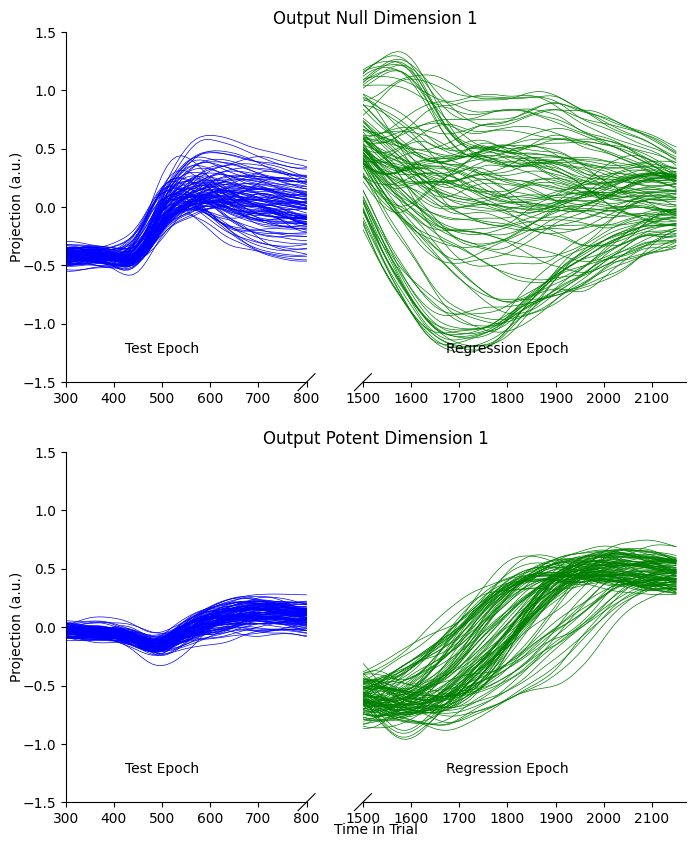

In [ ]:
_,_,_,_,_,_,_ = pcar.fig_4(J_all_tensor, J_mus_stack, plot = True, basis = 0)

>>> best_lam returning: 0.01


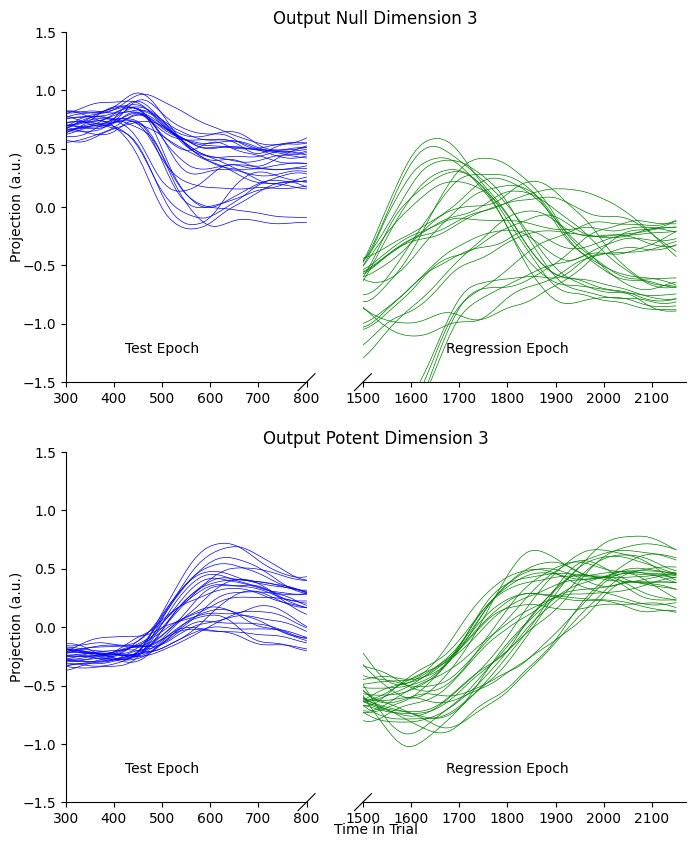

In [ ]:
_,_,_,_,_,_,_ = pcar.fig_4(J_all_tensor[:27,:,:], J_mus_tensor, plot = True, basis = 2)

>>> best_lam returning: 0.01


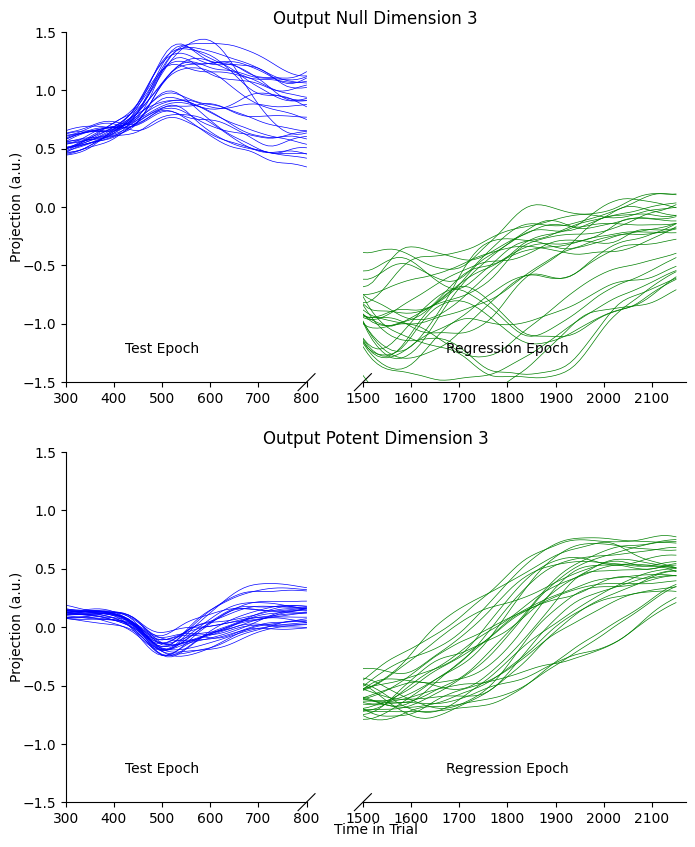

In [ ]:
_,_,_,_,_,_,_ = pcar.fig_4(J_all_tensor[27:54,:,:], J_mus_tensor, plot = True, basis = 2)

>>> best_lam returning: 0.01


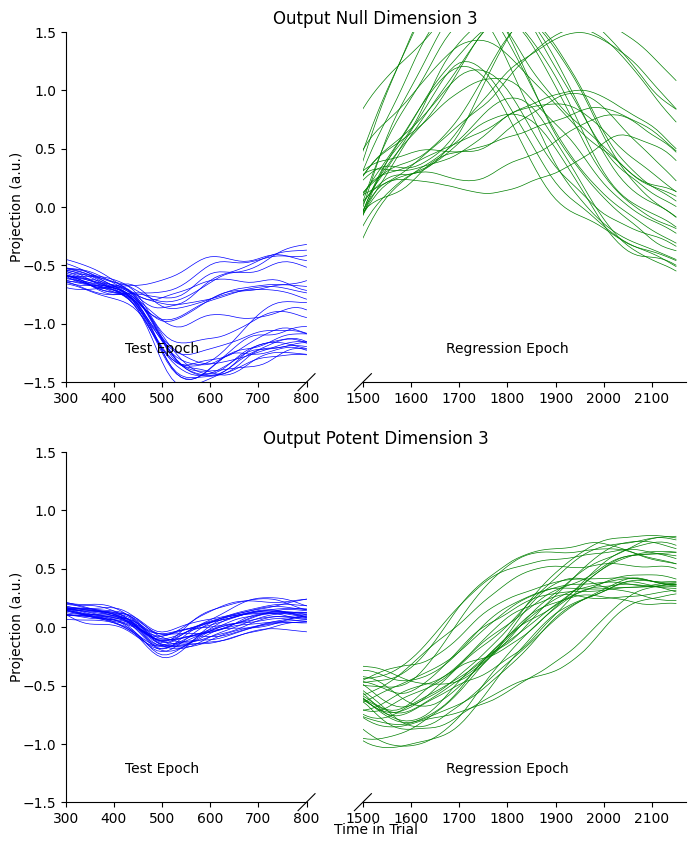

In [ ]:
_,_,_,_,_,_,_ = pcar.fig_4(J_all_tensor[54:81,:,:], J_mus_tensor, plot = True, basis = 2)

>>> best_lam returning: 0.01


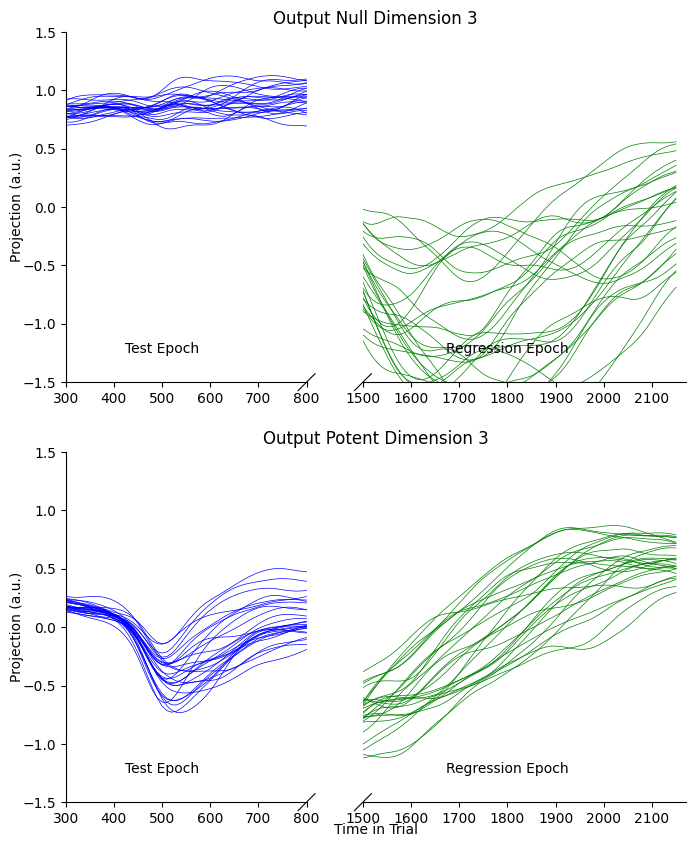

In [ ]:
_,_,_,_,_,_,_ = pcar.fig_4(J_all_tensor[81:108,:,:], J_mus_tensor, plot = True, basis = 2)

In [33]:
W, mus_test_mat, M_test_hat, M_hat_recon, R_squared, MSE_test, RMSE_test = pcar.fig_4(J_PMd_tensor, J_M1_tensor, dimensions = 14, plot = True, basis = 1, cv = False)
print (W)

TypeError: _BaseRidgeCV.__init__() got an unexpected keyword argument 'store_cv_values'

>>> best_lam returning: 0.01


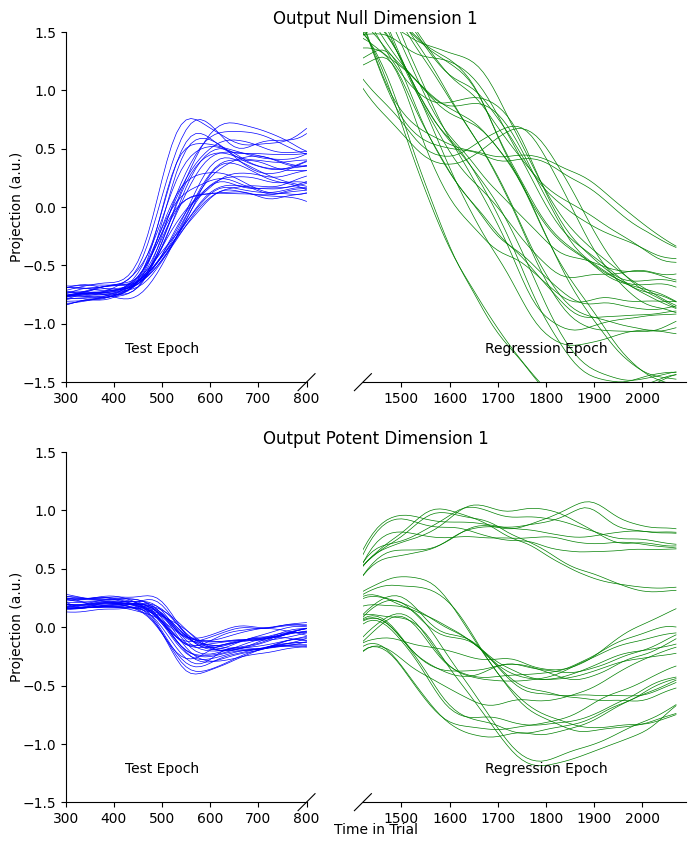

In [11]:

_,_,_,_,_,_,_ = pcar.fig_4(N_all_tensor, N_mus_tensor, plot = True, basis = 0)


>>> best_lam returning: 0.01


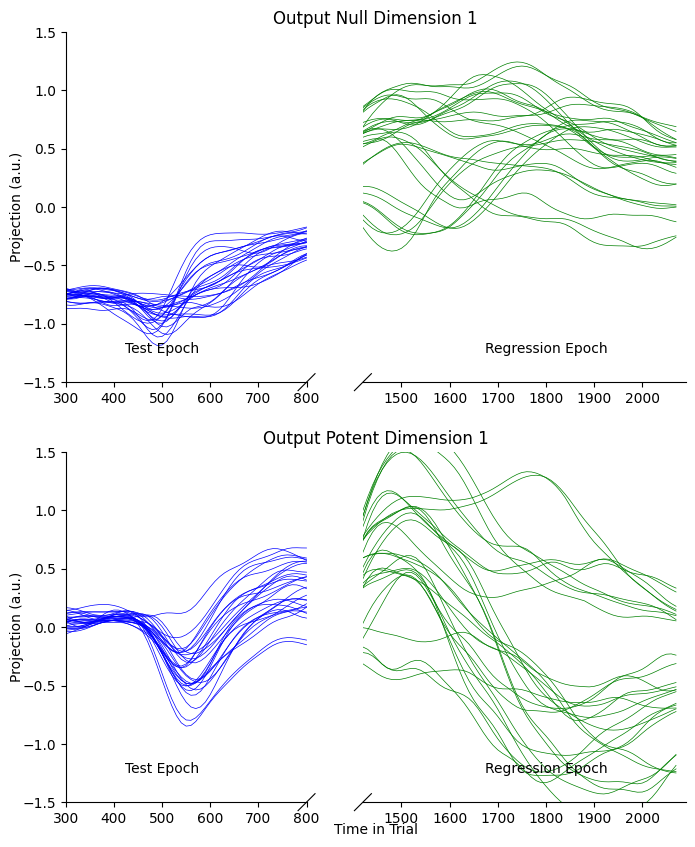

In [12]:
_,_,_,_,_,_,_ = pcar.fig_4(N_PMd_tensor, N_M1_tensor, plot = True, basis = 0)